In [13]:
from gp import GP, GPNonTerminal, Constant
from figtree import showtree
import operators as ops
import pandas as pd
import numpy as np
from figtree import showtree

In [2]:
gp = GP(operators=[ops.SUM, ops.PROD])

In [3]:
df = pd.DataFrame({'x': [float(i) for i in range(-100, 101)]})

In [4]:
gpt = gp.tree("([float]<PROD>([float]<PROD>([float]<PROD>([float]0.1962548432160222)([float]<PROD>([float]0.13235711605055814)([float]<SUM>([float]-0.3058042349923916)([float]0.13493571862626857))))([float]<PROD>([float]x)([float]-0.037229751791471755)))([float]0.12557040296012187))", x = df['x'])

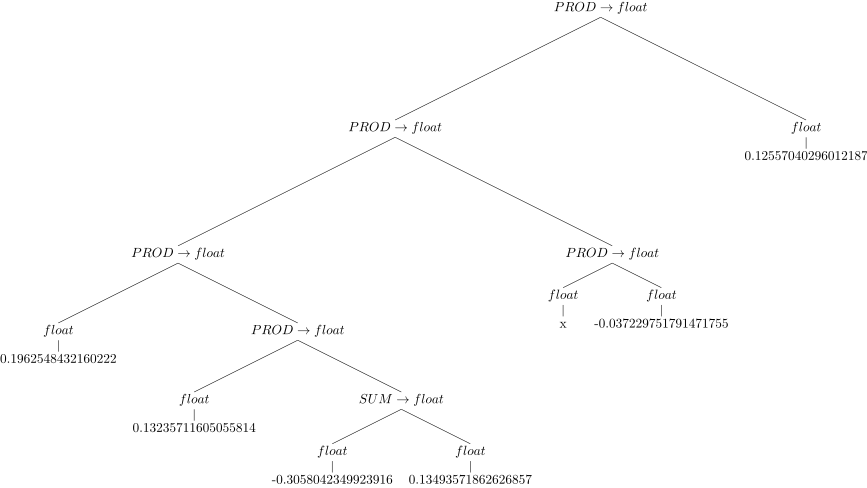

In [5]:
showtree(gpt)

In [6]:
gp.print_all_labels()

<class 'float'>:
([float]0.1962548432160222)
([float]0.13235711605055814)
([float]-0.3058042349923916)
([float]0.13493571862626857)
([float]<SUM>([float]-0.3058042349923916)([float]0.13493571862626857))
([float]<PROD>([float]0.13235711605055814)([float]<SUM>([float]-0.3058042349923916)([float]0.13493571862626857)))
([float]<PROD>([float]0.1962548432160222)([float]<PROD>([float]0.13235711605055814)([float]<SUM>([float]-0.3058042349923916)([float]0.13493571862626857))))
([float]x)
([float]-0.037229751791471755)
([float]<PROD>([float]x)([float]-0.037229751791471755))
([float]<PROD>([float]<PROD>([float]0.1962548432160222)([float]<PROD>([float]0.13235711605055814)([float]<SUM>([float]-0.3058042349923916)([float]0.13493571862626857))))([float]<PROD>([float]x)([float]-0.037229751791471755)))
([float]0.12557040296012187)
([float]<PROD>([float]<PROD>([float]<PROD>([float]0.1962548432160222)([float]<PROD>([float]0.13235711605055814)([float]<SUM>([float]-0.3058042349923916)([float]0.134935718626

In [11]:
def tree_reduce(tree_):
    if isinstance(tree_, GPNonTerminal):
        for t in tree_:
            tree_reduce(t)
        if np.prod([isinstance(t, Constant) for t in tree_]):
            replacement = Constant(tree_.treebank, tree_.label, tree_(), metadata=tree_.metadata)
            if tree_.parent:
                tree_.parent[tree_.parent.index_of(tree_)] = replacement
            tree_.delete()
            return replacement
        else:
            return tree_
    else:
        return tree_

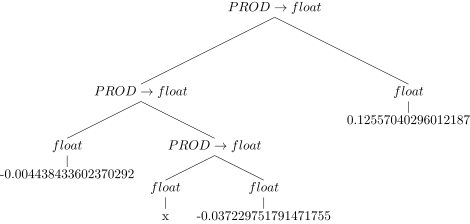

In [14]:
tree_reduce(gpt)
showtree(gpt)

In [15]:
gp.print_all_labels()

<class 'float'>:
([float]x)
([float]-0.037229751791471755)
([float]<PROD>([float]x)([float]-0.037229751791471755))
([float]<PROD>([float]-0.004438433602370292)([float]<PROD>([float]x)([float]-0.037229751791471755)))
([float]0.12557040296012187)
([float]<PROD>([float]<PROD>([float]-0.004438433602370292)([float]<PROD>([float]x)([float]-0.037229751791471755)))([float]0.12557040296012187))
([float]-0.004438433602370292)


In [20]:
gpt2 = GP(operators=[ops.SUM, ops.PROD, ops.POW, ops.SQ, ops.CUBE]).tree("([float]<SUM>([float]<PROD>([float]<SUM>([float]<PROD>([float]<PROD>([float]-0.2871075354307308)([float]<SUM>([float]<SUM>([float]<SUM>([float]0.15364132778450834)([float]-0.19100238214372292))([float]<SUM>([float]<SUM>([float]<PROD>([float]0.15658859248121051)([float]<SUM>([float]<PROD>([float]-0.42554115675817317)([float]0.11380127765731471))([float]<PROD>([float]0.08271744532739775)([float]<SUM>([float]<POW>([float]<PROD>([float]-0.22098065013799056)([float]<PROD>([float]0.14053702017584999)([float]<SUM>([float]0.20258445745109993)([float]-0.34301968457822574))))([int]4))([float]-0.2914643060831538)))))([float]<PROD>([float]<PROD>([float]-0.2071885475860736)([float]-0.3331066189115725))([float]-0.23709745215052125)))([float]0.07155910575312331)))([float]0.2528230072850972)))([float]<PROD>([float]<PROD>([float]-0.03227875214379544)([float]<PROD>([float]<PROD>([float]-0.23244913819462976)([float]<PROD>([float]0.128420712082473)([float]<PROD>([float]<SUM>([float]-0.23708248615686953)([float]-0.2947014094665846))([float]0.19412117456353278))))([float]<SUM>([float]<PROD>([float]<PROD>([float]<PROD>([float]0.1962548432160222)([float]<PROD>([float]<PROD>([float]-0.3738012587727192)([float]-0.3540841903131061))([float]<SUM>([float]-0.3058042349923916)([float]0.13493571862626857))))([float]<PROD>([float]x)([float]-0.037229751791471755)))([float]0.12557040296012187))([float]<POW>([float]<SUM>([float]0.20366139180329862)([float]<PROD>([float]0.10121064816272772)([float]<PROD>([float]0.050855593319661684)([float]0.16317141014536904))))([int]2)))))([float]<PROD>([float]-0.3327099192414857)([float]-2.7781302047098935))))([float]<PROD>([float]<PROD>([float]0.1753045947460741)([float]<POW>([float]<PROD>([float]0.09755585659796367)([float]0.062313783949715776))([int]0)))([float]0.04494775909623382)))([float]<PROD>([float]0.21222520109415716)([float]0.144981840927332)))([float]<PROD>([float]<PROD>([float]<SUM>([float]<PROD>([float]0.05661585616255206)([float]<PROD>([float]0.06822859322592795)([float]<SUM>([float]0.09844283589789754)([float]<SUM>([float]<SUM>([float]-0.31558580849280604)([float]<PROD>([float]<SUM>([float]<SUM>([float]<PROD>([float]<SUM>([float]<SUM>([float]0.11178690878762151)([float]0.2488081071157252))([float]<POW>([float]<PROD>([float]<SUM>([float]<PROD>([float]<PROD>([float]<SUM>([float]0.16351842859524043)([float]<PROD>([float]<PROD>([float]<SUM>([float]0.06038758034645242)([float]-0.2903584698293214))([float]<PROD>([float]-0.3969382465569617)([float]<SUM>([float]-0.19578079604068155)([float]-0.30482211349453187))))([float]<SUM>([float]<SUM>([float]<PROD>([float]0.17579005955539406)([float]0.28462649024829495))([float]<POW>([float]<SUM>([float]<SUM>([float]0.17063481157145477)([float]0.021135147204289308))([float]0.005145636293146259))([int]3)))([float]-0.28417943211387187))))([float]0.235997953503988))([float]<PROD>([float]-2.6513847788386853)([float]0.035286129638940594)))([float]-0.1830540132367878))([float]0.04494775909623382))([int]5)))([float]<PROD>([float]-0.42078878961872246)([float]-0.49851942357556583)))([float]<POW>([float]0.12206673565328331)([int]2)))([float]<SUM>([float]-0.02774307220847681)([float]-0.2985365126980931)))([float]<SUM>([float]<SUM>([float]0.11178690878762151)([float]0.014956852204518948))([float]<POW>([float]<PROD>([float]-0.30997240139606436)([float]0.19789608516266477))([int]5)))))([float]<PROD>([float]<SUM>([float]<SUM>([float]<SUM>([float]<SUM>([float]<PROD>([float]0.0576842406692831)([float]<SUM>([float]0.1251460173775908)([float]0.06686694645261332)))([float]0.15933046362047615))([float]<POW>([float]<SUM>([float]0.08683216665973058)([float]0.09315875050688631))([int]8)))([float]<POW>([float]0.041353245796222314)([int]5)))([float]<PROD>([float]<SUM>([float]-0.19478750594642408)([float]-0.2985365126980931))([float]<POW>([float]x)([int]3))))([float]-0.5426776244615852))))))([float]<PROD>([float]<SUM>([float]-2.5831787709593144)([float]<SUM>([float]<PROD>([float]<SUM>([float]-0.028153442748539488)([float]0.08814595229910321))([float]<SUM>([float]-0.30771788449428394)([float]<POW>([float]0.16900212453807567)([int]11))))([float]<SUM>([float]0.15063958265277513)([float]0.16655559417198582))))([float]<SUM>([float]0.15851565886658883)([float]<PROD>([float]<PROD>([float]0.17772288580520118)([float]<PROD>([float]-0.38017606689182565)([float]<SUM>([float]<POW>([float]0.06920140083525936)([int]2))([float]-0.34058216915009265))))([float]<POW>([float]0.21797327501308708)([int]6))))))([float]-0.32336981731578335))([float]-0.3513806965822064)))", x=df['x'])

In [22]:
print(gpt2.size())
showtree(gpt2)

227


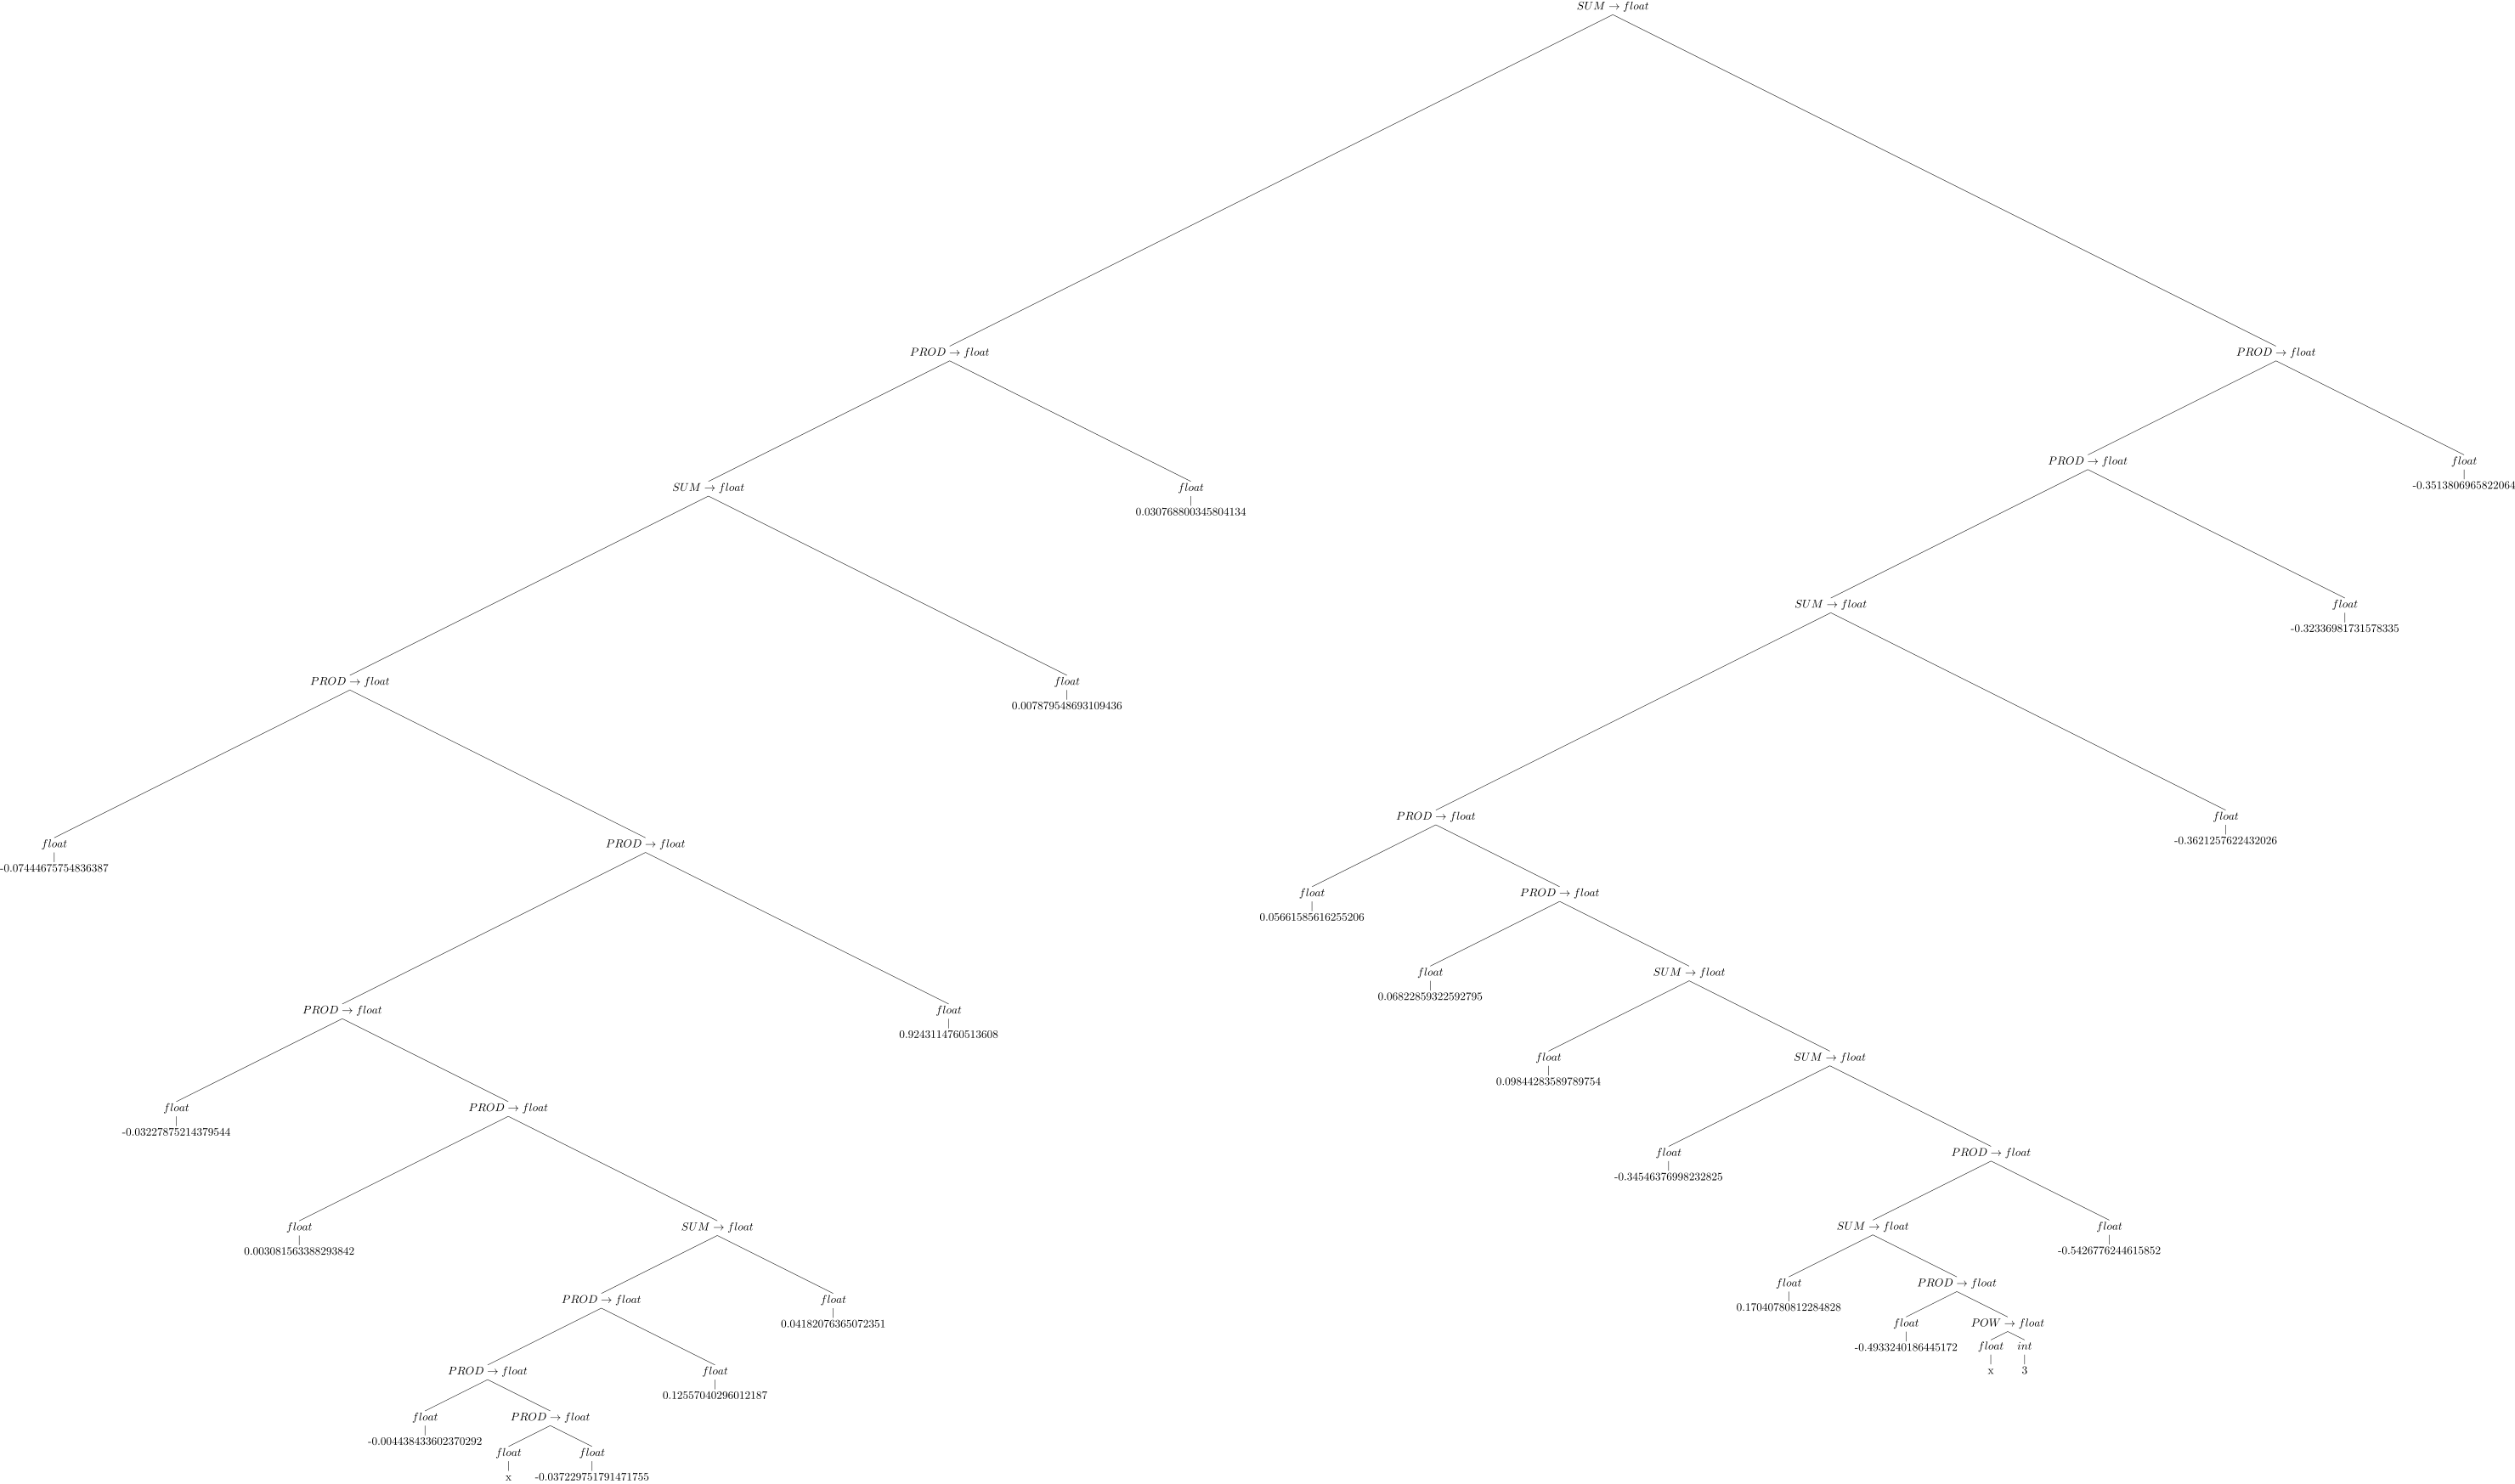

In [23]:
tree_reduce(gpt2)

showtree(gpt2)

In [24]:
print(gpt2.size())

45
